# Student Exam Score Analysis

importing essential libraries for EDA and Data Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importing csv files by using pandas

In [2]:
df = pd.read_csv("Student_scores.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

## Exploratory Data Analysis

Getting information of the data, its columns with Data type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


Checking shape of the Data (rows, columns)

In [4]:
shape = df.shape
print(shape)

(30641, 15)


To get descriptive statistical analysis of data

In [5]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


Inspecting null values present in data

In [6]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

Droping a column "Unnamed: 0" at axis=1 as it contain index numbers only

In [7]:
df = df.drop("Unnamed: 0", axis = 1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


Correcting Data type of NrSiblings

In [8]:
df['NrSiblings'] = df['NrSiblings'].astype(pd.Int64Dtype())
df['NrSiblings'].dtypes

Int64Dtype()

Statistical analysis on the score numerical data

In [9]:
a = df[['MathScore', 'ReadingScore', 'WritingScore']].agg(["mean", "std", "max", "min"])
print(round(a,2))

      MathScore  ReadingScore  WritingScore
mean      66.56         69.38         68.42
std       15.36         14.76         15.44
max      100.00        100.00        100.00
min        0.00         10.00          4.00


Gender Distribution of Students

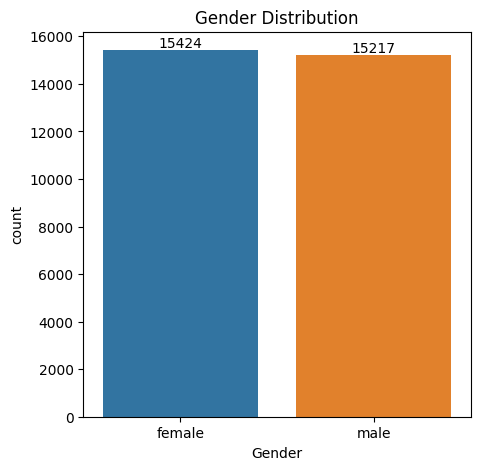

In [10]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = "Gender", hue = "Gender")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Gender Distribution")
plt.show()

In [11]:
grp = df.groupby("Gender").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
print(grp)

        MathScore  ReadingScore  WritingScore
Gender                                       
female  64.080654     72.853216     72.856457
male    69.069856     65.854571     63.920418


Parents Education Impact on Students Scores

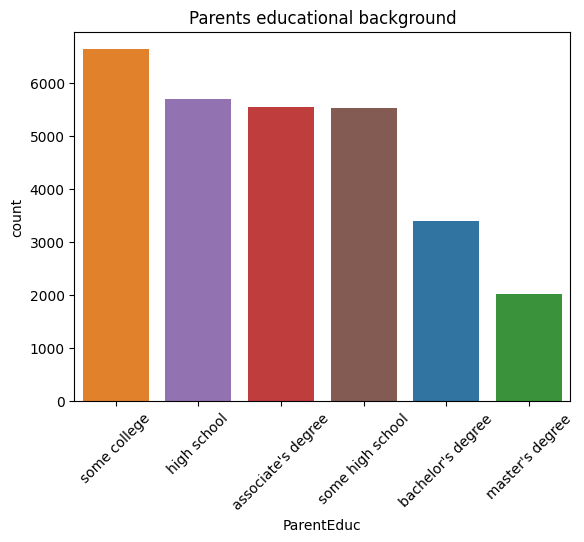

In [12]:
order=['some college', 'high school', "associate's degree", 'some high school', "bachelor's degree", "master's degree"]
sns.countplot(x=df['ParentEduc'], order = order, hue = df['ParentEduc'], legend = False)
plt.title('Parents educational background')
plt.xticks(rotation=45);

In [13]:
gb = df.groupby("ParentEduc").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


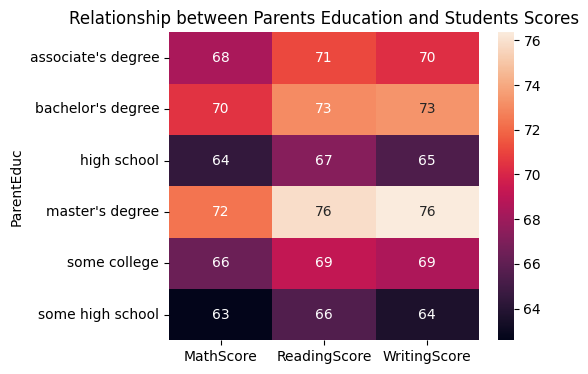

In [14]:
plt.figure(figsize = (5,4))
sns.heatmap(gb, annot = True)
plt.title("Relationship between Parents Education and Students Scores")
plt.show()

Parents Martial Status impact on Students Scores

In [15]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


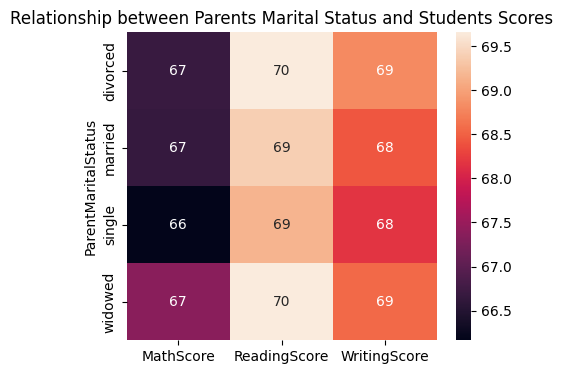

In [16]:
plt.figure(figsize = (5,4))
sns.heatmap(gb1, annot = True)
plt.title("Relationship between Parents Marital Status and Students Scores")
plt.show()

Test Preparation vs Students Scores

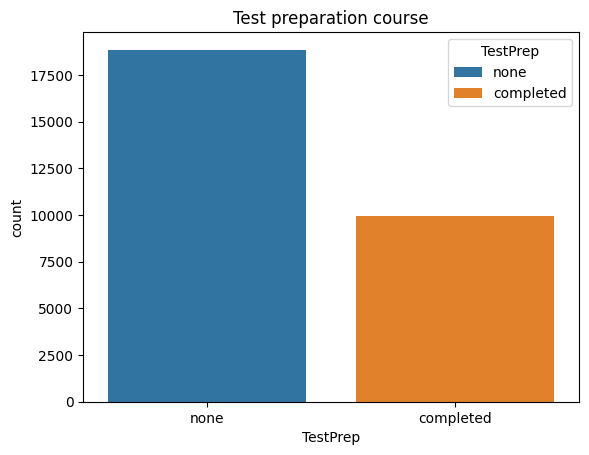

In [17]:
sns.countplot(x=df['TestPrep'], hue = df['TestPrep'])
plt.title('Test preparation course');

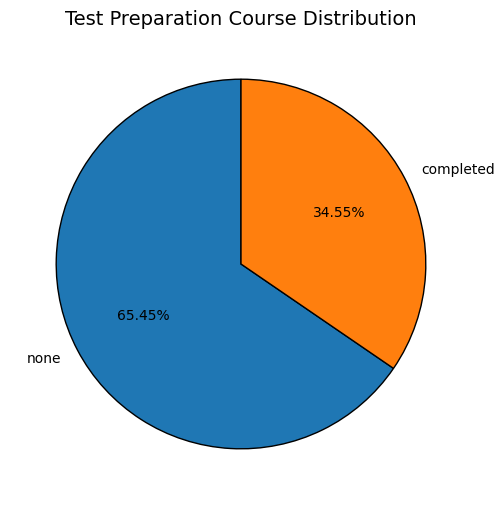

In [18]:
test_prep_counts = df['TestPrep'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(test_prep_counts, labels=test_prep_counts.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Title
plt.title('Test Preparation Course Distribution', fontsize=14)

# Show the plot
plt.show()

In [19]:
gb2 = df.groupby("TestPrep").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
print(gb2)

           MathScore  ReadingScore  WritingScore
TestPrep                                        
completed   69.54666     73.732998     74.703265
none        64.94877     67.051071     65.092756


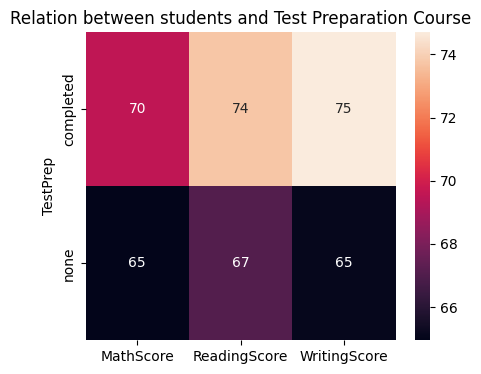

In [20]:
plt.figure(figsize = (5,4))
sns.heatmap(gb2, annot = True)
plt.title("Relation between students and Test Preparation Course")
plt.show()

Student Scores vs Hours they Study in a week

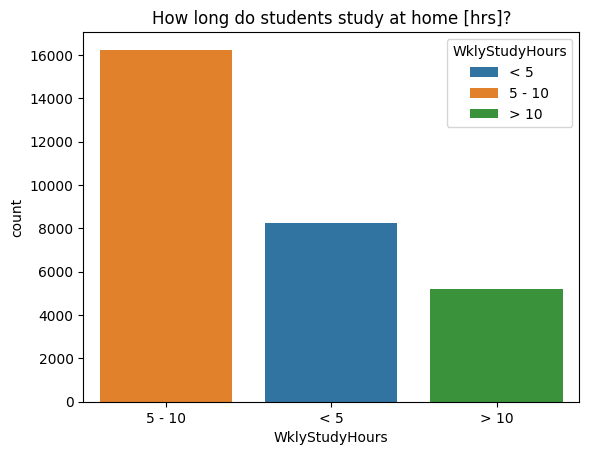

In [21]:
sns.countplot(x=df['WklyStudyHours'], order=['5 - 10', '< 5', '> 10'], hue =df['WklyStudyHours'])
plt.title('How long do students study at home [hrs]?');

In [22]:
gb3 = df.groupby("WklyStudyHours").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
print(gb3)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


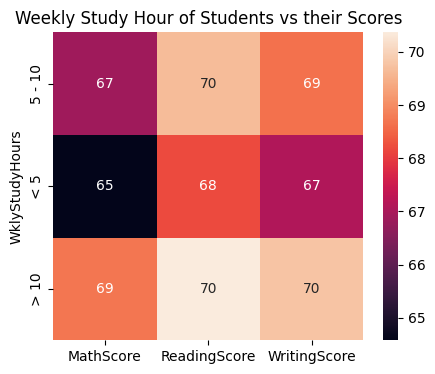

In [23]:
plt.figure(figsize = (5,4))
sns.heatmap(gb3, annot = True)
plt.title("Weekly Study Hour of Students vs their Scores")
plt.show()

Checking Outliers of each Exam

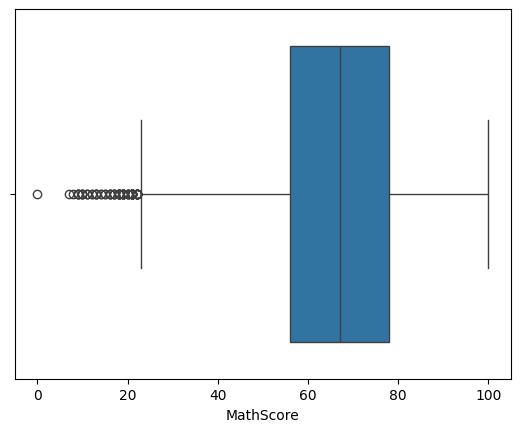

In [24]:
sns.boxplot(data=df, x = "MathScore")
plt.show()

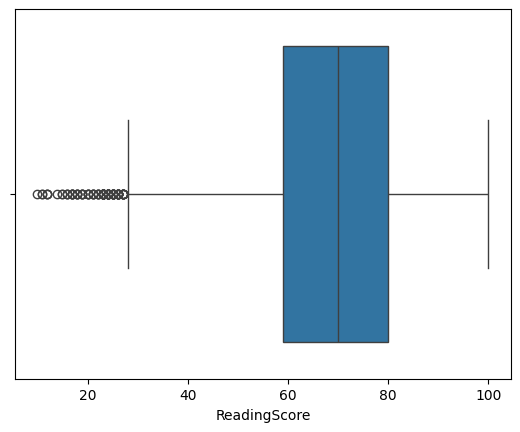

In [25]:
sns.boxplot(data=df, x = "ReadingScore")
plt.show()

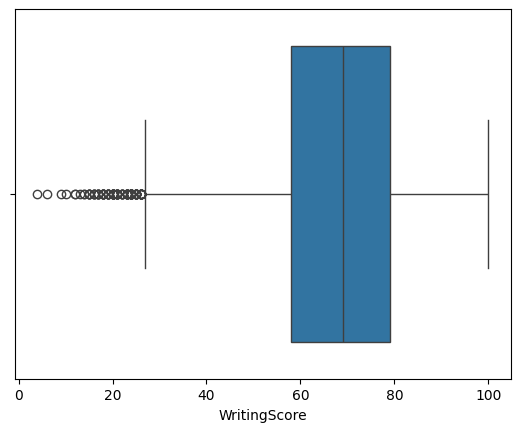

In [26]:
sns.boxplot(data=df, x = "WritingScore")
plt.show()

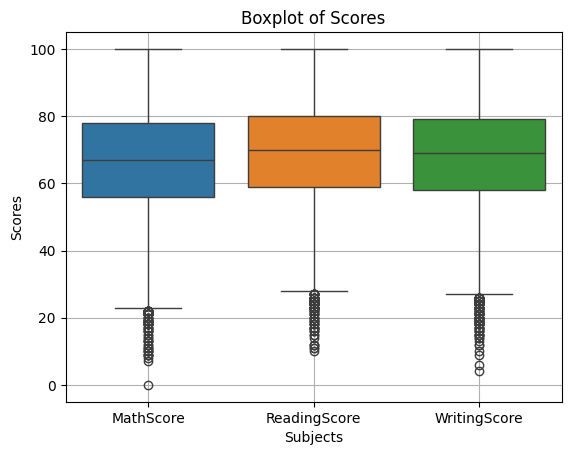

In [27]:
sns.boxplot(data=df[["MathScore", "ReadingScore", "WritingScore"]])
plt.xlabel("Subjects")
plt.ylabel("Scores")
plt.title("Boxplot of Scores")
plt.grid()
plt.show()

Distribution of Ethnic Groups

In [28]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


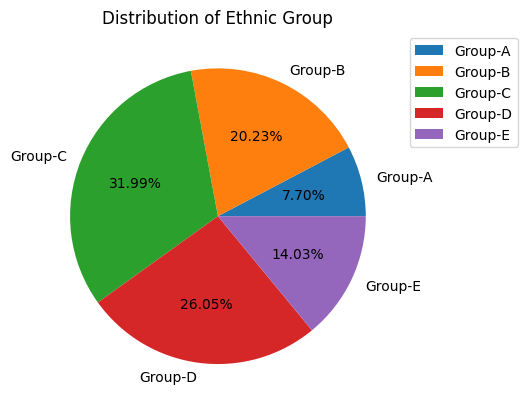

In [29]:
groupA = df.loc[(df["EthnicGroup"] == "group A")].count()
groupB = df.loc[(df["EthnicGroup"] == "group B")].count()
groupC = df.loc[(df["EthnicGroup"] == "group C")].count()
groupD = df.loc[(df["EthnicGroup"] == "group D")].count()
groupE = df.loc[(df["EthnicGroup"] == "group E")].count()

l = ["Group-A", "Group-B", "Group-C", "Group-D", "Group-E"]
mlist = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]
plt.pie(mlist, labels = l, autopct = "%1.2f%%")
plt.title("Distribution of Ethnic Group")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

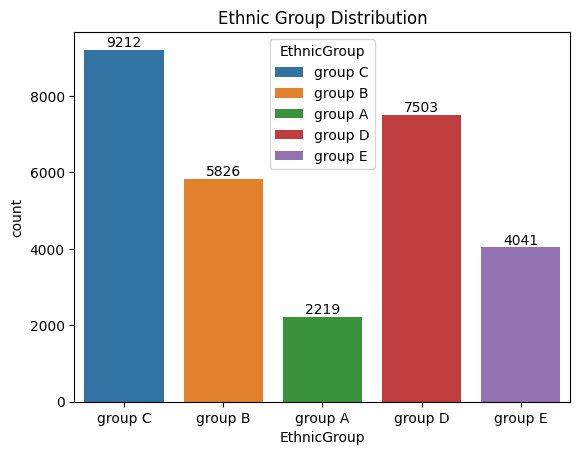

In [30]:
ax = sns.countplot(data = df, x = 'EthnicGroup', hue = 'EthnicGroup')
for container in ax.containers:
    ax.bar_label(container) 
#ax.bar_label(ax.containers[0])  0,1,2,3....
plt.title("Ethnic Group Distribution")
plt.show()

Text(95.72222222222221, 0.5, 'Ethnic Group')

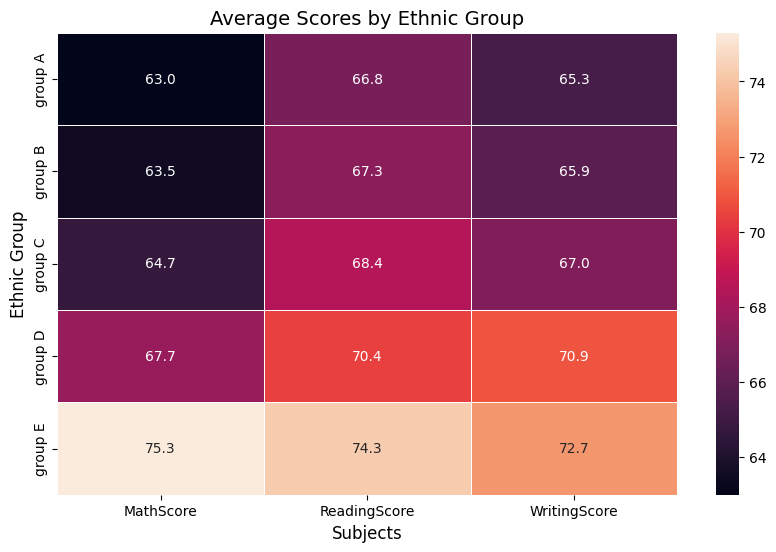

In [31]:
# Grouping by Ethnic Group and calculating average scores
ethnic_scores = df.groupby('EthnicGroup')[['MathScore', 'ReadingScore', 'WritingScore']].mean()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ethnic_scores, annot=True, fmt=".1f", linewidths=0.5)

# Titles and labels
plt.title("Average Scores by Ethnic Group", fontsize=14)
plt.xlabel("Subjects", fontsize=12)
plt.ylabel("Ethnic Group", fontsize=12)


Lunch Type

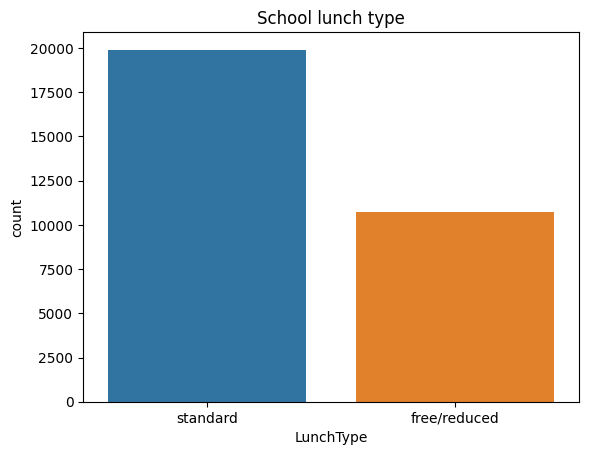

In [32]:
sns.countplot(x=df['LunchType'], hue =df['LunchType'] )
plt.title('School lunch type');

In [33]:
gb4 = df.groupby("LunchType").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
print(gb4)

              MathScore  ReadingScore  WritingScore
LunchType                                          
free/reduced  58.862332     64.189735     62.650522
standard      70.709370     72.175634     71.529716


Practice Sports impact on Students Score

Text(0.5, 1.0, 'How often do students practice sports?')

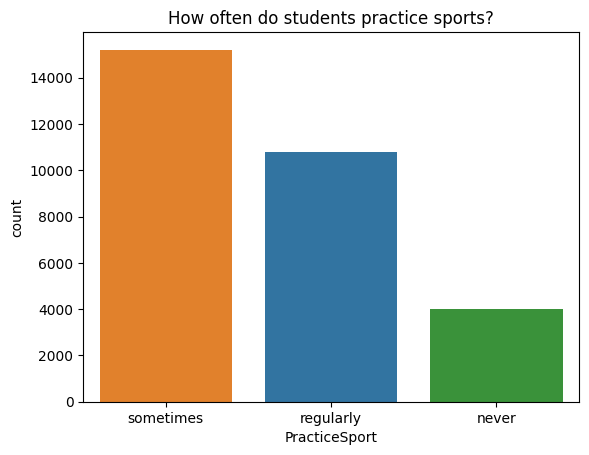

In [34]:
sns.countplot(x=df['PracticeSport'], order = ['sometimes', 'regularly', 'never'], hue = df['PracticeSport'], legend = False)
plt.title('How often do students practice sports?')

In [35]:
grp1 = df.groupby('PracticeSport')[['MathScore', 'ReadingScore', 'WritingScore']].mean()
print(grp1)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


Means of Transport to School

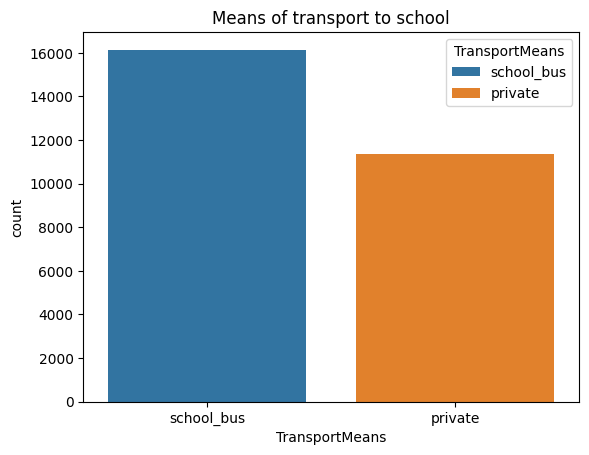

In [36]:
sns.countplot(x=df['TransportMeans'], hue =df['TransportMeans'] )
plt.title('Means of transport to school');

In [37]:
grp2 = df.groupby('TransportMeans')[['MathScore', 'ReadingScore', 'WritingScore']].mean()
print(grp2)

                MathScore  ReadingScore  WritingScore
TransportMeans                                       
private         66.511354     69.472364     68.509593
school_bus      66.674636     69.446206     68.492351


Number of Siblings Student has

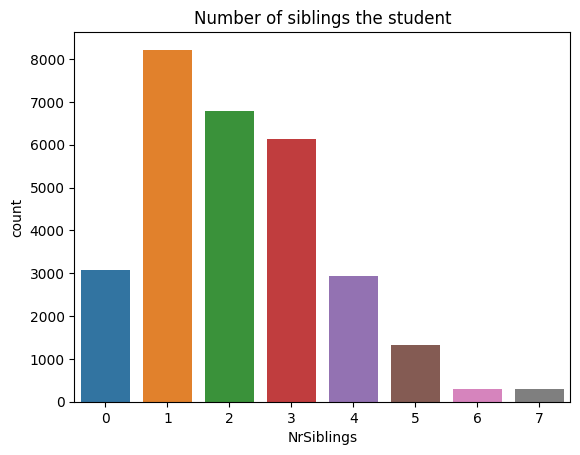

In [38]:
sns.countplot(x=df['NrSiblings'], order=[0, 1, 2, 3, 4, 5, 6, 7], hue = df['NrSiblings'], legend = False, palette = "tab10" )
plt.title('Number of siblings the student');

In [39]:
grp2 = df.groupby('NrSiblings')[['MathScore', 'ReadingScore', 'WritingScore']].mean()
print(grp2)

            MathScore  ReadingScore  WritingScore
NrSiblings                                       
0           66.819449     69.547812     68.746515
1           66.473896     69.259097     68.245345
2           66.554934     69.472018     68.522533
3           66.719092     69.488159     68.650498
4           66.245495     69.144169     68.073444
5           66.630303     69.453788     68.282576
6           65.917219     68.801325     67.860927
7           67.615120     69.828179     68.986254


Conclusion